In [28]:
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [29]:
# #optional
import sklearn as sl
import warnings
warnings.filterwarnings("ignore")
sl.__version__

'0.23.2'

In [30]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("Cancer input shape is: ", cancer.data.shape)

Cancer input shape is:  (569, 30)


In [31]:
X = cancer.data
Y = cancer.target

LR: 0.935025 (0.039221)
LDA: 0.959555 (0.029449)
KNN: 0.926253 (0.046232)
CART: 0.922650 (0.027469)
NB: 0.936779 (0.036077)
SVM: 0.915758 (0.077166)


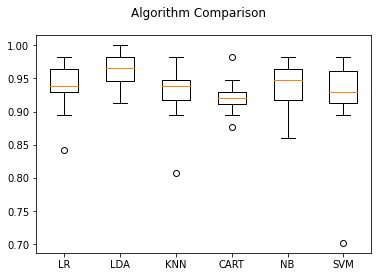

In [32]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [33]:
from sklearn.model_selection import train_test_split
# Training the model. Model wasnot trained before it was just evaluated by accuracy
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [34]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
#also
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ScaledLR: 0.971401 (0.029462)
ScaledLDA: 0.953865 (0.033254)
ScaledKNN: 0.953961 (0.040699)
ScaledCART: 0.907778 (0.052815)
ScaledNB: 0.936280 (0.033143)
ScaledSVM: 0.964831 (0.020203)


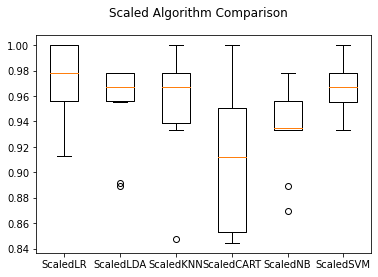

In [35]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
num_folds = 10
seed = 7
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [36]:
# The best is scaled ScaledLR: 0.971401 - logistic regression
#     so we can go further to tune hyperparameters for this. 

In [37]:
#Tuning Logistic Regression
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
penalty = ['l1', 'l2']
param_grid = dict(C=c_values, penalty=penalty)
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))
print ('--------------------------')
#####
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.9780193236714976 using {'C': 0.3, 'penalty': 'l2'}
--------------------------
nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
0.975894 (0.020593) with: {'C': 0.1, 'penalty': 'l2'}
nan (nan) with: {'C': 0.3, 'penalty': 'l1'}
0.978019 (0.023993) with: {'C': 0.3, 'penalty': 'l2'}
nan (nan) with: {'C': 0.5, 'penalty': 'l1'}
0.975797 (0.026832) with: {'C': 0.5, 'penalty': 'l2'}
nan (nan) with: {'C': 0.7, 'penalty': 'l1'}
0.971401 (0.029462) with: {'C': 0.7, 'penalty': 'l2'}
nan (nan) with: {'C': 0.9, 'penalty': 'l1'}
0.971401 (0.029462) with: {'C': 0.9, 'penalty': 'l2'}
nan (nan) with: {'C': 1.0, 'penalty': 'l1'}
0.971401 (0.029462) with: {'C': 1.0, 'penalty': 'l2'}
nan (nan) with: {'C': 1.3, 'penalty': 'l1'}
0.971449 (0.033882) with: {'C': 1.3, 'penalty': 'l2'}
nan (nan) with: {'C': 1.5, 'penalty': 'l1'}
0.971449 (0.033882) with: {'C': 1.5, 'penalty': 'l2'}
nan (nan) with: {'C': 1.7, 'penalty': 'l1'}
0.971449 (0.033882) with: {'C': 1.7, 'penalty': 'l2'}
nan (nan) with: {'C': 2.0, 'pena

In [38]:
# accuracy increased fom 0.971 to 0.978
#after this we prepare the model with the tuned hyperparameter

In [39]:
# Prepare the model - if you just want to use only one model . if not you can bag several models - ensembles
# scaler = StandardScaler().fit(X_train)
# s_X = scaler.transform(X_train)
# model = LogisticRegression(C=0.3, penalty='l2')
# model.fit(s_X, Y_train)

In [40]:
# after tunning we could use ensembles to combine the best models. probably best 3 models

AB: 0.964879 (0.034203)
GBM: 0.951739 (0.030620)
RF: 0.956039 (0.024173)
ET: 0.956135 (0.032379)


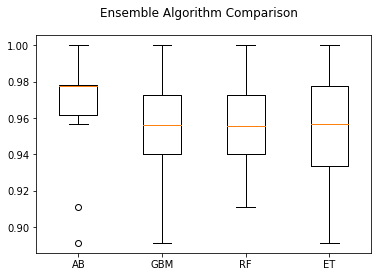

In [41]:
#new imports 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [42]:
# Finalize Model
scaler = StandardScaler().fit(X_train)
s_X = scaler.transform(X_train)
model = LogisticRegression(C=0.3, penalty='l2')
model.fit(s_X, Y_train)


LogisticRegression(C=0.3)

In [43]:
# estimate accuracy on validation dataset

#new imports
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9649122807017544
[[36  4]
 [ 0 74]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        40
           1       0.95      1.00      0.97        74

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

